Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Andrew San"
COLLABORATORS = ""

---

# Lab 5: Multivariate Linear Regression

In this lab we will work through the process of:
1. implementing a linear regression model
2. defining, implementing and testing multiple loss functions 
3. minimizing loss functions using gradient descent
4. comparing with python library functions
5. Using the model to predict on test data 


## Initialize

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)
plt.style.use('fivethirtyeight')
sns.set()
sns.set_context("talk")
%matplotlib inline

# Univariate Linear Regression
In the first task of the lab, we will model linear regression based on a data set that contains housing data (data/USA_Housing.csv). 

# Task 1 - Initialization
Read the file into a dataframe and keep only the features you need. We will be doing univariate and multivariate regression on housing data.The goal is to find a model that will allow us to predict hosuing prices given certain values.

### Activity 1.1  Read Data

In [3]:
import pandas as pd
df=pd.read_csv('data/USA_Housing.csv', sep=',',header=None)
df , df.columns = df[1:] , df.iloc[0]
df.columns
# list(df.columns)
df_adjusted = df[['Avg. Area House Age','Avg. Area Number of Rooms','Price']]  
df_adjusted
# keep only the columns "Avg. Area House Age" and "Avg. Area Number of Rooms" and Price

,Avg. Area House Age,Avg. Area Number of Rooms,Price
1,5.682861322,7.009188143,1059033.558
2,6.002899808,6.730821019,1505890.915
3,5.86588984,8.51272743,1058987.988
4,7.188236095,5.586728665,1260616.807
5,5.040554523,7.839387785,630943.4893
...,...,...,...
4996,7.830362444,6.137356228,1060193.786
4997,6.999134987,6.576762661,1482617.729
4998,7.250590615,4.80508098,1030729.583
4999,5.534388416,7.130143864,1198656.872


In [4]:
## Split the data, df_adjusted into training (90%) and testing (10%) using sklearn
from sklearn.model_selection import train_test_split
df_training, df_testing = train_test_split(df_adjusted, test_size=.1, train_size = .9, random_state = 50)
df_training
df_testing
# df_training = 
# df_testing =                              
# we will be using test data later in this assignment

,Avg. Area House Age,Avg. Area Number of Rooms,Price
3432,5.828142871,4.85142302,612938.7145
2043,6.918945345,6.245655683,1347083.07
80,6.954422126,8.516160048,1492011.496
4664,5.195406378,8.368912846,1223915.253
3641,7.271422215,5.685407675,1368692.297
...,...,...,...
4927,5.367789514,7.287303779,980049.3901
3700,5.128212246,7.247375951,1578141.053
3302,7.398134291,7.517188956,1890056.385
3325,6.901876796,7.58807521,1689690.754


### Activity 1.2 Normalize Data
In this task, you need to normalize df_training data using MinMaxScaler from sklearn.preprocessing. Normalize all df_training data columns to be between 0 and 1. X_scaled_values are the normalized x values of housing data and Y_scaled_values are the scaled values of prices.

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
### BEGIN ANSWER
X_scaled_values = scaler.fit_transform(df_training[['Avg. Area House Age','Avg. Area Number of Rooms']])
# Y_scaled_values = scaler.fit_transform(df_adjusted[['Avg. Area Number of Rooms']])
Y_scaled_values = scaler.fit_transform(df_training[['Price']])
X_scaled_values[0].size
### END ANSWER
x = X_scaled_values.transpose()
y = Y_scaled_values.transpose()[0,:]

### Activity 1.3 Plot the feature data to see if a linear regression line is a good fit
It is helpful to understand if the data lends to a linear regression model. In this activity, we will plot the points to see if a line fit to data is reasonable. Plot housing prices vs "Avg. Area House Age" and "Avg. Area Number of Rooms"

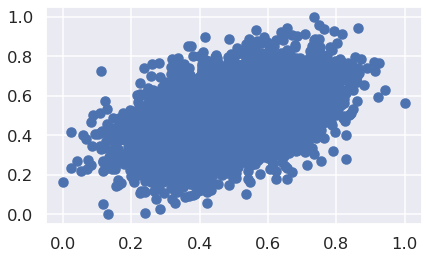

In [6]:
import numpy as np
import matplotlib.pyplot as plt
# plot x = "Avg. Area House Age" and y = price
### BEGIN ANSWER
plot1 = plt.scatter(x[0],y)
### END ANSWER

[[0.5026345  0.28560736 0.3648142  ... 0.79899389 0.39457287 0.26608873]
 [0.3073306  0.33596457 0.46473142 ... 0.32095968 0.35491706 0.35728827]]


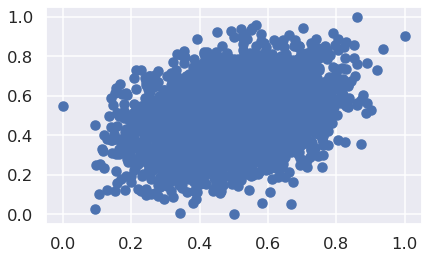

In [7]:
import numpy as np
import matplotlib.pyplot as plt
# plot x = "Avg. Area Number of Rooms" and y = price
### BEGIN ANSWER
print(x)
plot1 = plt.scatter(x[1],y)



### END ANSWER

## Question 1.4
##### BEGIN ANSWER
question: Based on what you see in the plot, do you think it is fine to use linear regression to predict housing prices? Why?

I would use a linear regression as there does seem to be a distinct linea correlation between price and the number of rooms / area.

##### END ANSWER

# Task 2 Manual Exploration of Linear Regression Line
In this task we will manually explore the linear regression line for the model x = "Avg. Area House Age" and y = price. This will give us a good intution about the process.
The goal now is to fit a line 
$$
h(\theta) = \theta_0 + \theta_1*x 
$$
to all data points (x,y), such that the L2 error 
$$
 E(\theta) = \sum(h(\theta)-y)^2 $$ is minimized. In this task we will manually change the values of theta0 and theta1 such that we obtain the smallest possible error. 


In [8]:
# define the function h(theta)
def h(theta0, theta1, x):
    return theta0 + theta1 * x

# print(x[:,0])

### Activity 2.1 - Define the square loss (L2) function
Define the function, sqerror that computes the error based on the arguments provided. The function h(theta) is as defined above. Assume that x and y are the observed vectors. We use the average square loss or L2 loss in this case. 

In [9]:
import numpy as np

## BEGIN ASNWER
def sqerror(x, y, theta0, theta1):
    # """
    # Input: parameters theta0 and theta1 of the model
    # Input: x, y vectors
    # Returns: L2 square error
    # Assumptions: none
    # """
    ans = ((h(theta0,theta1,x)-y)**2).mean()
    return ans
    
    
## END ANSWER

## testing
print(sqerror(x[0], y, 0.29,0.52))
print(sqerror(x[1], y, 0.29,0.52))
# 0.018851448326533217
# 0.02182381539562264

0.018851448326533248
0.021823815395622573


### Activity 2.2 - Define the L1 Absolute error function
Define the function, abserror that computes the avarega absolute error based on the arguments provided. The function h(theta) is as defined above. Assume that x and y are the observed vectors. We use the average abssolute error in this case.

In [10]:
import numpy as np
import math

## BEGIN ANSWER
def abserror(x, y, theta0, theta1):
    """
    Input: parameters theta0 and theta1 of the model 
    Input: x, y vectors
    Returns: L1 error
    Assumptions: none
    """
    ans = (abs((h(theta0,theta1,x)-y))).mean()
    return ans
    
## END ANSWER

## testing
print(abserror(x[0], y, 0.29,0.52))
print(abserror(x[1], y, 0.29,0.52))

0.10961636709557822
0.11777276790770351


### Activity 2.3 - Define the Pseudo Huber loss function
Define the function, huberror that computes the pseudo huber error based on the two arguments provided. The function h(theta) is as defined above. Assume that x and y are the observed vectors. The equation for this function is given by 
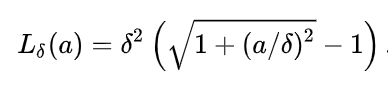
The following function finds the average huber error. In this equation, a  = |h(theta) - y| (see notes for details)

In [11]:
import numpy as np
import math

## BEGIN ANSWER
def huberror(x, y, theta0, theta1, delta):
    """
    Input: parameters theta0, theta1 and delta of the model 
    Input: x, y vectors
    Returns: psuedo huber error
    Assumptions: none
    """
    return ((delta**2) * (np.sqrt(1+((abs(h(theta0, theta1, x) - y)/delta) **2))-1)).mean()

## END ANSWER

## testing
print(huberror(x[0], y, 0.29,0.52,0.1))
print(huberror(x[1], y, 0.29,0.52,0.1))
# type(x[0])


0.005791489779469562
0.006458677517895609


### Activity 2.4 Interactive Exploration.
Let us initialize the interat widget to create sliders that allows us to change the values of theta0 and theta1 and see how things change. Complete the function f below. The function is expected to get two values theta0 and theta1 and plot both the observed points (x,y) and the regression line on the same plot. It also needs to compute the error and display and error.

In [12]:
from ipywidgets import interact
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [13]:
# interactive panel
import pylab
import numpy

def f(theta0, theta1):
    """
    Plot the line and points in an interactive panel
    """
    # plot the line for theta0 and theta1
    y1 = h(theta0, theta1, x[0]) 
    # compose plot
    pylab.plot(x[0],y1) 
    
    # compute the L2 error for theta0 and theta1 for 5 decimal places
    sqerr = round(sqerror(x[0], y, theta0, theta1),6)
    # compute the absolute or L1 error for theta0 and theta1
    abserr = round(abserror(x[0], y, theta0, theta1),4)
    # compute the phub error for theta0 and theta1
    huberr = round(huberror(x[0], y, theta0, theta1, 0.01),4)
    pylab.title('L1=' + str(abserr) + '  L2=' + str(sqerr) + '  hub=' + str(huberr))
    
    # plot the points
    x1 = x[0]   
    y1 = Y_scaled_values
    pylab.scatter(x1, y1, alpha=0.5)
    pylab.show() # show the plot  

interact(f, theta1=(0,1,0.1), theta0=(0,1,0.1));


interactive(children=(FloatSlider(value=0.0, description='theta0', max=1.0), FloatSlider(value=0.0, descriptio…

### Activity 2.5 Record the best values for each error function
Write the "best" values you found for theta0 (y-intercept) and theta1 (slope) and the error. 
This error is the minimum you have observed based on the manual exploration using the widget 
above.

In [14]:
# BEST VALUES FOR AVE SQUARE ERROR
theta0 = .2
theta1 =.6
error = .1043
# BEST VALUES FOR AVE ABS ERROR
theta0 = .2
theta1 = .6
error = .017061
# BEST VALUES FOR AVE HUBER ERROR
theta0 = .2
theta1 = .6
error = .001

# Task 3 - Gradient Descent - Univariate
In this task we use the Gradient descent methods to find a "better" values for theta0 and theta1 that minimizes the error. Gradient descent is an iterative algorithm. It computes values of theta0 and theta1 in the direction of reaching the minimum point in the error function. The iterative formulas using L2 loss function for theta0 and theta1 are given by:
$$
\theta_0 = \theta_0 - \alpha*(\sum(\theta_1*x^j + \theta_0)-y^j)
$$
$$
\theta_1 = \theta_1 - \alpha*(\sum(\theta_1*x^j + \theta_0 - y^j)*x^j
$$

The alpha is called the "learning rate". $(x^j, y^j)$ is the j-th observation. It is important to pick a good value for alpha so that convergence is not too slow (small alpha) or be at the risk of over shooting the minimum point (large alpha). You may have to experiemnt with few alphas to find something that works.

### Activity 3.1 Compute Parameters using the Gradient Descent algorithm (L2 loss)

Please print out the theta0 and theta1 values for each iteration in your function. You may get different output compare with the sample output depends on your initial theta0 and theta1 values. We will accept any answers which are close to the sample output.

In [15]:
# given the observed data (obsX,obsY), learning rate (alpha), and desired error threshold, 
# the function returns theta0 and theta1 when it reaches the error threshold.
# The convergence is reached when the abs(newError - oldError) is less than the threshold.

# BEGIN ANSWER  

def gd2(obsX, obsY, alpha, threshold):
    """
    Input : observed vectors X, Y, alpha and threshold
    Return theta0, theta1 from Gradient Descent L2 loss algorithm
    Return: Iterations and L2 Error
    """
    theta0 = 0
    theta1 = 0
    interations = []
    error = sqerror(obsX,obsY,theta0,theta1)
    var_theta0 = theta0
    var_theta1 = theta1
    olderror = 0
    newerror = 0
    change = 1000000
    while (change > threshold):
        olderror = newerror
        temp = "theta0= " + str(var_theta0) + " theta1= " + str(var_theta1) + " error = " + str(error)
        # print('error: ' + str(newerror) + " theta0: " + str(var_theta0) + " theta1: " + str(var_theta1))
        interations.append(temp)
        var_theta0 = var_theta0 - alpha * ((var_theta1 * obsX + var_theta0) - obsY).mean()
        var_theta1 = var_theta1 - alpha * (((var_theta1 * obsX + var_theta0) - obsY)*obsX).mean()
        newerror = sqerror(obsX,obsY,var_theta0,var_theta1)
        change = abs(newerror-olderror)
        
    return var_theta0,var_theta1,newerror,interations
# END ANSWER

[theta0,theta1,newError,iterations] = gd2(x[0],y,0.01,0.0001)
print(len(iterations), newError)
# print(iterations)
# for i in range(0,len(iterations)):
#     print(iterations[i])
# error: 0.021534883928262367 theta0: 0.06475232015100979 theta1: 0.8647523201510101

167 0.021831363777721213


In [16]:
# observe theta0 and theta1
theta0, theta1

# the loss never reaches the values .0001

(0.3487025522374391, 0.1792926940264689)

### Activity 3.2 Compute Gradient Descent (Huber)
First Compute a formula for Pseudo huber gradient descent using derivative methods discussed in class and recitation. Similar to L2 descent, use the new formulas (obtained from pseudo huber derivatives) to compute values of theta1, theta1, error. The pseudo huber loss function is provided in Activity 2.3. Use that to differentiate the huber function wrt to theta0 and theta1. 

Please print out the theta0 and theta1 values for each iteration in your function. You may get different output compared with the sample output depending on your initial theta0 and theta1 values. We will accept any answers which are close to the sample output.

In [17]:
# given the observed data (obsX,obsY), learning rate (alpha), and desired error, 
# the function returns theta0, theta1, error and iterations
# that reaches a minimum error threshold

## BEGIN ANSWER

def gdh(obsX, obsY, alpha, threshold, delta):
    """
    Input : observed vectors X, Y, alpha and threshold
    Return theta0, theta1 from Gradient Descent huber loss algorithm
    Return: Iterations and huber Error
    """
    theta0 = 0
    theta1 = 0
    interations = []
    error = sqerror(obsX,obsY,theta0,theta1)
    var_theta0 = theta0
    var_theta1 = theta1
    olderror = 0
    newerror = 0
    change = 1000000
    while (change > threshold):
        olderror = newerror
        temp = "theta0= " + str(var_theta0) + " theta1= " + str(var_theta1) + " error = " + str(error)
        # print('error: ' + str(newerror) + " theta0: " + str(var_theta0) + " theta1: " + str(var_theta1))
        interations.append(temp)
        var_theta0 = var_theta0 - alpha * ((theta0 - obsY + theta1 * obsX)/(np.sqrt((theta0 - obsY + theta1 * obsX)**2/delta**2) +1)).mean()
        var_theta1 = var_theta1 - alpha * (obsX*(theta0 - obsY + theta1 * obsX)/(np.sqrt((theta0 - obsY + theta1 * obsX)**2/delta**2) +1)).mean()
        newerror = huberror(obsX,obsY,var_theta0,var_theta1,delta)
        change = abs(newerror-olderror)
        
    return var_theta0,var_theta1,newerror,interations
    
    
    
## END ANSWER

# testing    
[theta0,theta1,newError,iterations] = gdh(x,y,0.01,0.000001,0.01)
print(len(iterations), newError)
# for i in range(0,len(iterations)):
#     print(iterations[i])
# error: 0.0010493643127726525 theta0: 0.09757567528952661 theta1: 0.7975756752895258

2533 0.0018992180795052687


### Activity 3.3 Compare with Library Estimators
Now use the sklearn LinearRegression module to automate this process. What coefficients do you get? Are they close to what you received from gradient descent? Find the error from sklearn package. Is that error smaller or bigger than the squared error you received?

In [18]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
# print(x[0])
# print(y)
result = lm.fit(x[0].reshape(-1,1),y)
print(result.intercept_)
print(result.coef_)

0.2743222808765401
[0.45661798]


In [19]:
theta0 = result.intercept_
theta1 = result.coef_
sqerror(x[0],y,theta0,theta1)

0.016611812091141386

# Task 4 - Extending the Model to a Bivariate
In this task we extend the model to predict housing price using two features "$x_1 = $Avg. Area House Age" and "$x_2 = $Avg. Area Number of Rooms". The regression model is then defined by  
$$
y = \theta_2*x_2 + \theta_1*x_1 + \theta_0
$$

## Activity 4.1
We need to estimate the values of $\theta_2, \theta_1, \theta_0$. 
The $\theta_0$ formula is given below (using L2 norm). Using the same formating write the formulas for $\theta_1$ and $\theta_2$. The alpha is called the "learning rate". It is important to pick a good value for alpha so that convergence is not too slow (small alpha) or be at the risk of over shooting the minimum point (large alpha). You may have to experiemnt with few alphas to find something that works. 
Refer to class lectures for more help. 

$$
\theta_0 = \theta_0 - \alpha*(\sum(\theta_2*x_2^j + \theta_1*x_1^j + \theta_0)-y^j)
$$



/* write equations for $\theta_1$ and $\theta_2$ here /
$$
\theta_1 = \theta_1 - \alpha*x_1^j(\sum(\theta_2x_2^j + \theta_1x_1^j + \theta_0)-y^j)
$$
$$
\theta_2 = \theta_2 - \alpha*x_2^j(\sum(\theta_2x_2^j + \theta_1*x_1^j + \theta_0)-y^j)
$$


## Activity 4.2 Compute Parameters using the Gradient Descent Algorithm (L2 loss)
Print out the $\theta_0$, $\theta_1$ and $\theta_2$ values for each iteration in your function. You may get different outputs depends on your initial choice of $\theta_0$, $\theta_1$ and $\theta_2$ values. We will accept any answers which are close to the sample output.

In [20]:
# given the observed data (obsX,obsY), learning rate (alpha), and desired error threshold, 
# the function returns theta0, theta1 and theta2 when it reaches the error threshold.
# The convergence is reached when the abs(newError - oldError) is less than the threshold.

# BEGIN ANSWER
def h3(theta0, theta1, theta2, x):
    return (theta0 + theta1 * x[0] + theta2 * x[1])

def newL2(theta0, theta1, theta2, x):
    return ((h3(theta0, theta1, theta2, x) - y)**2).mean()
    
def gd22(obsX, obsY, alpha, threshold):
    """
    Input : observed vectors X, Y, alpha and threshold
    Return theta0, theta1, theta2 from Gradient Descent L2 loss algorithm
    Return: Iterations and L2 Error
    """
    theta0 = 0
    theta1 = 0
    theta2 = 0
    dtheta0 = 0
    dtheta1 = 0
    dtheta2 = 0
    change = 1000000 
    oldError =0
    newError =0
    iterations=0 
    while (change>threshold):
        oldError= newError
        theta0 = theta0-alpha *((theta2 * obsX[1]+theta1 * obsX[0] + theta0 - obsY).mean())
        theta1 = theta1-alpha*obsX[0]*((theta2 * obsX[1]+theta1 * obsX[0] + theta0 - obsY).mean())
        theta2 = theta2-alpha*obsX[1]*((theta2 * obsX[1]+theta1 * obsX[0] + theta0 - obsY).mean())
        newError = newL2(theta0, theta1, theta2, obsX)
        change = abs (newError - oldError)
        iterations=iterations+1
    return theta0, theta1, theta2, newError, iterations

    
# END ANSWER

[theta0,theta1,theta2, newError,iterations] = gd22(x,y,0.01,0.0001)
print(iterations, newError)

144 0.018096035460154772


Write the values of thetas obtained from function above.
$$\theta_0 =$$ 
$$\theta_1 =$$ 
$$\theta_2 =$$ 
and write the model 
$$
y = \theta_2*x_2 + \theta_1*x_1 + \theta_0
$$

## Activity 4.3 Compare Coefficients with Library Estimators
Now use the sklearn LinearRegression module to automate the process of finding coefficients. 

In [21]:
# fit a regression model
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# assume

Y = y
X = np.stack(x)
Y = np.array(Y)
X = X.reshape(2, -1).T
Y = Y.reshape(-1)
# len(X)

model = LinearRegression().fit(X, y)
model
print(model.coef_)
libtheta1,libtheta2 = model.coef_
print(model.intercept_)
libtheta0 = model.intercept_

[0.45718158 0.36702939]
0.09096981082366068


What coefficients do you get? Are they close to what you received from gradient descent? ]Is that error smaller or bigger than the squared error you received?

##### Begin Answer
my coefficients were 0.45718158 0.36702939. They are close at all.
and the error is : 0.09096981082366068 which is _____ 
##### End Answer

## Activity 4.4.1 - Predict the Housing Price using test set data - gradient descent
Use the test set to find the estimated value of the home $y$ using coefficients received from gradient descent. Defined the average error as 1/m * $\sum$ abs(predicted - actual) where m is the size of the test data set.

In [27]:
## Begin ANSWER
X_scaled_values = scaler.fit_transform(df_testing[['Avg. Area House Age','Avg. Area Number of Rooms']])
# Y_scaled_values = scaler.fit_transform(df_adjusted[['Avg. Area Number of Rooms']])
Y_scaled_values = scaler.fit_transform(df_testing[['Price']])
X_scaled_values[0].size
### END ANSWER
x = X_scaled_values.transpose()[0,:]
# print(x)
# print(y)
y = Y_scaled_values.transpose()

error_gs = abs(theta0 + theta1 * x[0] + theta2 * x[1] - y).mean()

## End ANSWER
error_gd = print(abs(error_gs))

[0.17351949 0.57010297 0.64839304 0.50356793 0.58177623 0.3062715
 0.37831638 0.47475295 0.01500207 0.6947626  0.23922023 0.51721249
 0.23037443 0.51635224 0.5424786  0.56332583 0.70652067 0.46112775
 0.42223597 0.31432184 0.66445539 0.44637862 0.54257358 0.37558894
 0.67402757 1.         0.42667793 0.15871402 0.63827348 0.95013835
 0.15481262 0.61937325 0.59479583 0.59840062 0.12912921 0.49594159
 0.50290579 0.35217912 0.31783127 0.3987405  0.53195876 0.53673448
 0.05602718 0.72274    0.4876456  0.41449913 0.68349309 0.49613794
 0.66573096 0.72109373 0.44328129 0.63101124 0.28637789 0.70004202
 0.20474076 0.65001443 0.3761349  0.4372987  0.47389944 0.03323073
 0.53480538 0.39709602 0.53657614 0.47227714 0.62444075 0.47769574
 0.39807865 0.51913006 0.66724804 0.54468565 0.17160938 0.53416089
 0.83534517 0.48439173 0.42951431 0.6620628  0.46387616 0.39387856
 0.55788766 0.39846655 0.29629035 0.61219051 0.5718321  0.59294452
 0.43938687 0.59047081 0.58470668 0.57356312 0.49908065 0.60824

ValueError: operands could not be broadcast together with shapes (4500,) (1,500) 

## Activity 4.4.2 - Predict the Housing Price using test set data - library estimator
Use the test set to find the estimated value of the home $y$ using coefficients received from library estimators. Defined the averge error as 1/m * $\sum$ abs(predicted - actual) where m is the size of the test data set.

In [ ]:
## Begin ANSWER
error_lib = abs(libtheta0 + libtheta1 * x[0] + libtheta2 * x[1] - y).mean()

## End ANSWER
error_lib = print(abs(error_lib))